In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
pd.options.mode.chained_assignment = None
plt.rcParams["figure.figsize"] = (35,7)

In [2]:
rawData = '../Data_Raw/Nov2018.csv'
stableSourceData = '../Data_Filtered/Nov2018_StableSource.csv'
unstableSourceData = '../Data_Filtered/Nov2018_UnstableSource.csv'

In [3]:
def read_data(filename, fields):
    if fields is None:
        return pd.read_csv(filename).fillna(method='ffill')
    else:
        return pd.read_csv(filename, usecols=fields).fillna(method='ffill')

In [4]:
# read data and fill gaps
data = read_data(rawData, None)

In [5]:
data.describe()

,IP.NSRCGEN:BIASDISCAQNV,IP.NSRCGEN:GASSASAQN,IP.NSRCGEN:OVEN1AQNP,IP.NSRCGEN:SOURCEHTAQNI,IP.SAIREM2:FORWARDPOWER,IP.SOLCEN.ACQUISITION:CURRENT,IP.SOLEXT.ACQUISITION:CURRENT,IP.SOLINJ.ACQUISITION:CURRENT,ITF.BCT15:CURRENT,ITF.BCT25:CURRENT,ITH.BCT41:CURRENT,ITL.BCT05:CURRENT
count,2.895813e+06,2.895821e+06,2.895806e+06,2.895809e+06,2.866351e+06,2.895780e+06,2.895812e+06,2.895780e+06,2.895804e+06,2.895821e+06,2.895823e+06,2.895824e+06
mean,-2.376427e+02,5.214812e+00,1.162637e+01,1.578974e+00,1.569228e+03,2.411330e+02,1.254565e+03,1.195600e+03,1.607747e-01,2.701305e-02,2.711428e-02,1.617116e-01
std,4.871813e+01,2.546105e-01,4.987458e+00,4.001241e-01,4.352946e+02,3.230627e+01,6.203730e+01,6.111705e+01,6.092341e-02,1.116557e-02,1.092309e-02,4.662086e-02
min,-3.500000e+02,1.876000e+00,0.000000e+00,-4.220000e-02,2.000000e+01,1.300000e-01,-5.000000e-01,-3.300000e-01,-7.000000e-04,-2.629000e-01,-8.400000e-03,-2.905000e-01
25%,-2.580000e+02,5.162000e+00,6.227000e+00,1.505800e+00,1.028000e+03,2.200100e+02,1.259360e+03,1.179890e+03,1.676000e-01,2.800000e-02,2.800000e-02,1.660000e-01
50%,-2.390000e+02,5.185000e+00,1.260400e+01,1.562000e+00,1.612000e+03,2.400100e+02,1.259450e+03,1.190850e+03,1.850000e-01,3.120000e-02,3.140000e-02,1.752000e-01
75%,-2.350000e+02,5.207000e+00,1.545700e+01,1.698500e+00,1.948000e+03,2.500000e+02,1.259950e+03,1.210510e+03,1.932000e-01,3.280000e-02,3.300000e-02,1.837000e-01
max,0.000000e+00,1.000000e+01,2.107400e+01,3.333300e+00,2.102000e+03,3.500200e+02,1.270070e+03,1.275940e+03,2.211000e-01,4.010000e-02,4.050000e-02,2.226000e-01


In [12]:
data.shape

(2895824, 4)

In [9]:
data.head(n=5)

,Timestamp (UTC_TIME),IP.NSRCGEN:BIASDISCAQNV,IP.NSRCGEN:GASSASAQN,IP.NSRCGEN:OVEN1AQNP,IP.NSRCGEN:SOURCEHTAQNI,IP.SAIREM2:FORWARDPOWER,IP.SOLCEN.ACQUISITION:CURRENT,IP.SOLEXT.ACQUISITION:CURRENT,IP.SOLINJ.ACQUISITION:CURRENT,ITF.BCT15:CURRENT,ITF.BCT25:CURRENT,ITH.BCT41:CURRENT,ITL.BCT05:CURRENT
0,2018-11-01 00:00:14.855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0030
1,2018-11-01 00:00:17.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0009,0.0030
2,2018-11-01 00:00:23.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0009,0.0006
3,2018-11-01 00:00:25.655,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0009,-0.0009,0.0006
4,2018-11-01 00:00:42.455,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0009,-0.0009,-0.0017


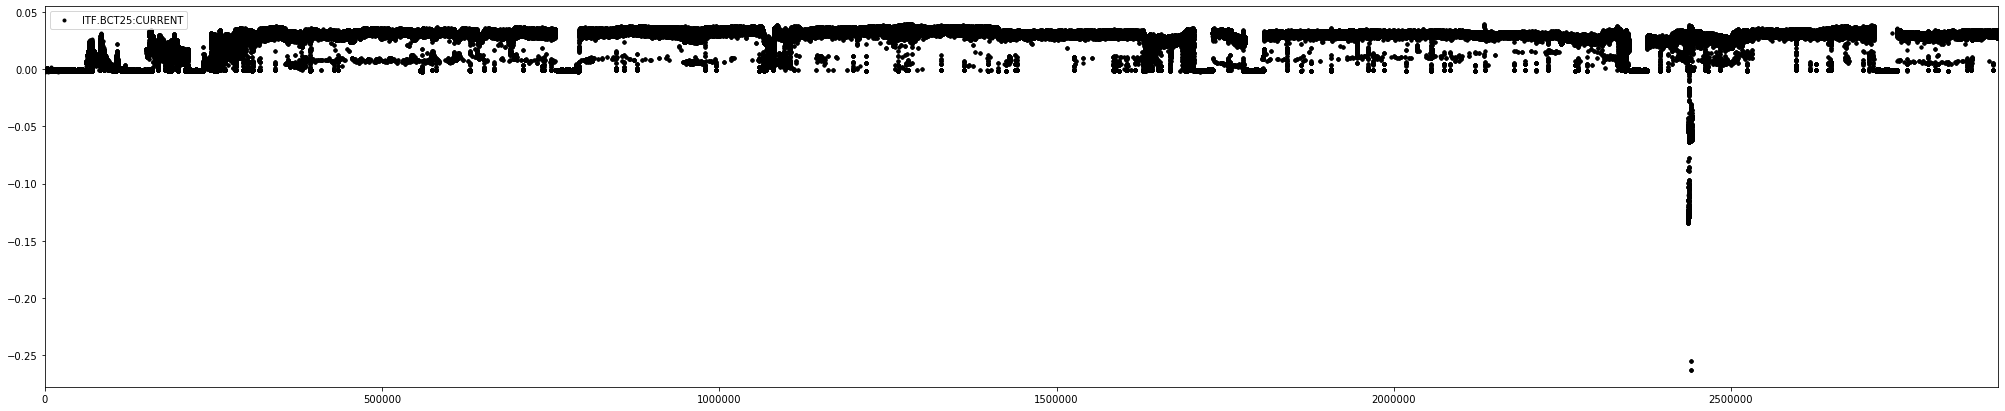

In [13]:
data.plot(style='k.', y='ITF.BCT25:CURRENT')
plt.show()

### Manual Filtering
As can be seen in the above plot, the source was running pretty stable during the month of December. We filter out the time ranges where the source had problems, as right now we are only interested in the parameters that made for a stable beam.

The other data will probably need to be considered too, because we want to search for parameters that on the one hand increase the stability of the source, but also have a low probability of failure.

In [15]:
separators = [0, 300000, 756500, 792000, 1062000, 1105000, 1625000, 1800000, 2330000, 2378000, 2436600, 2442500, 2713000, 2746000, 2800000]
# Important!: The source will be marked as INSTABLE between the first two values

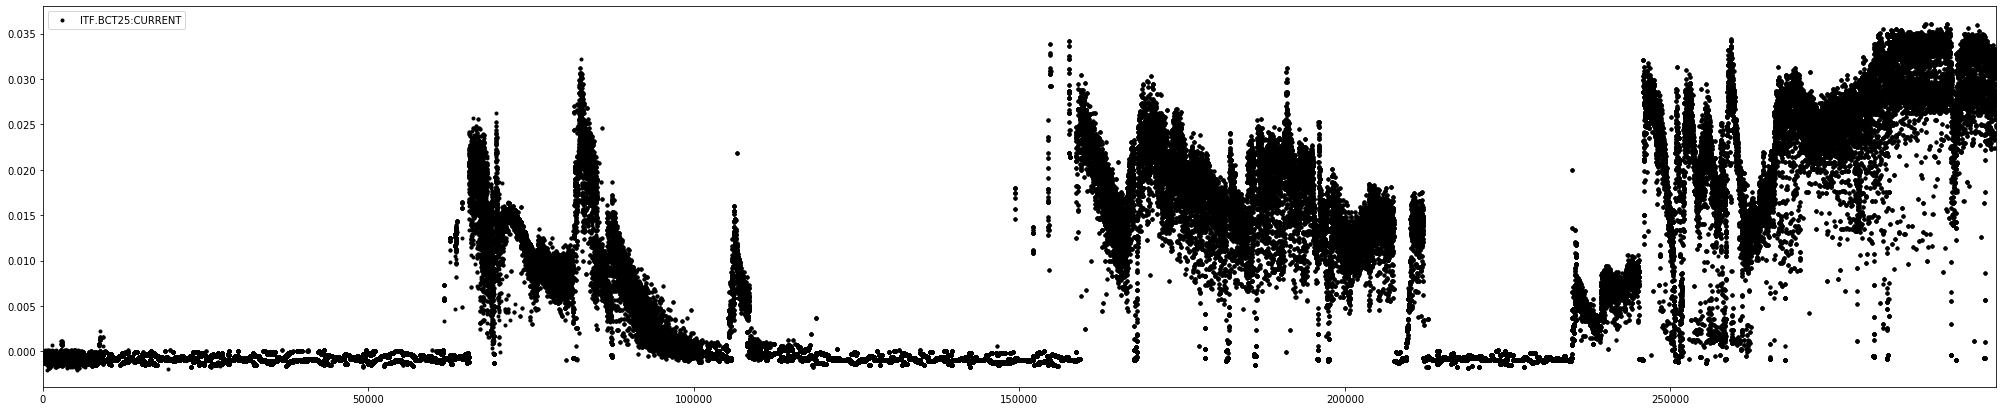

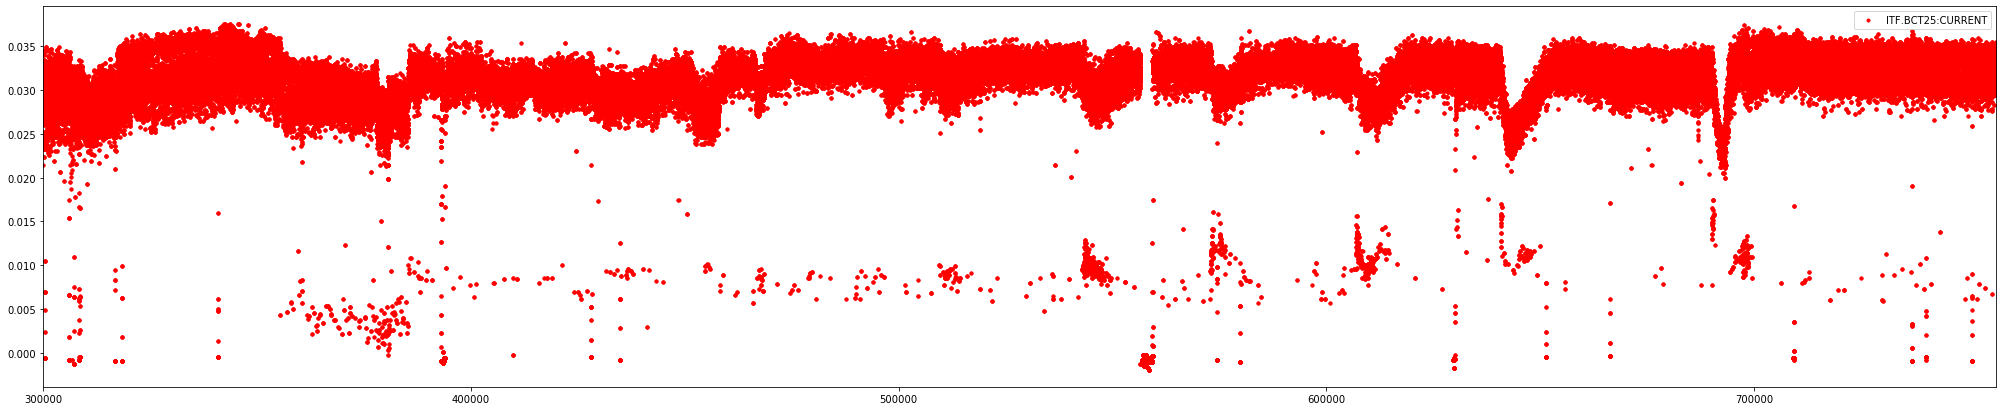

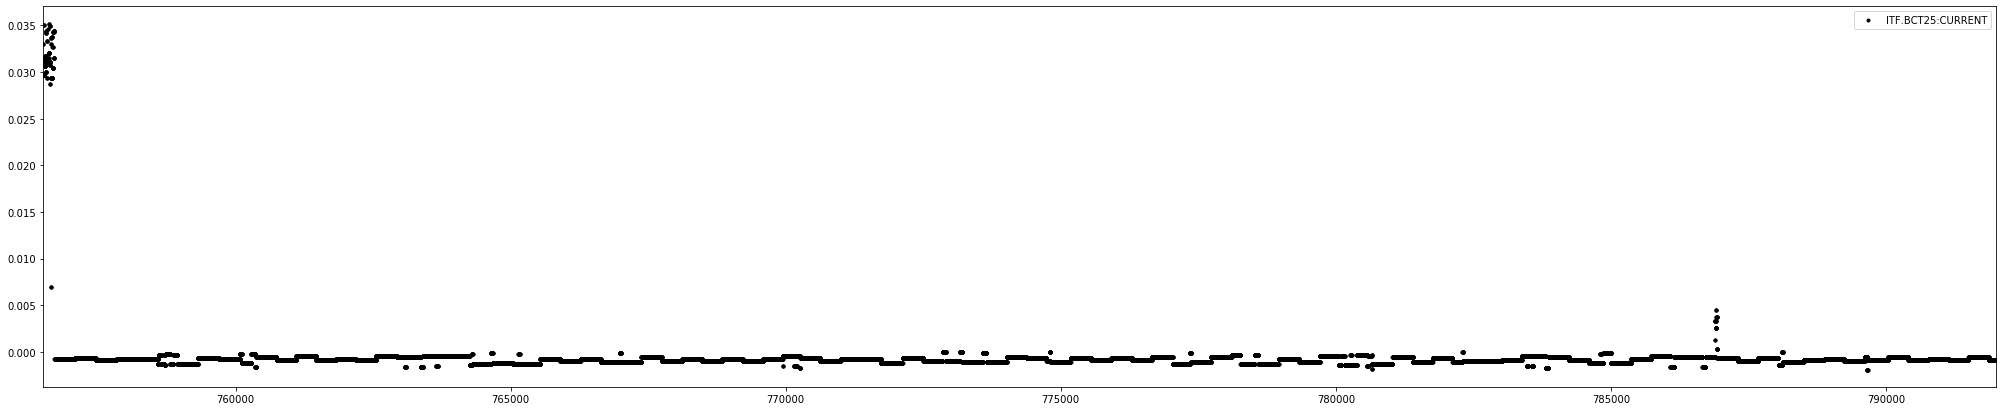

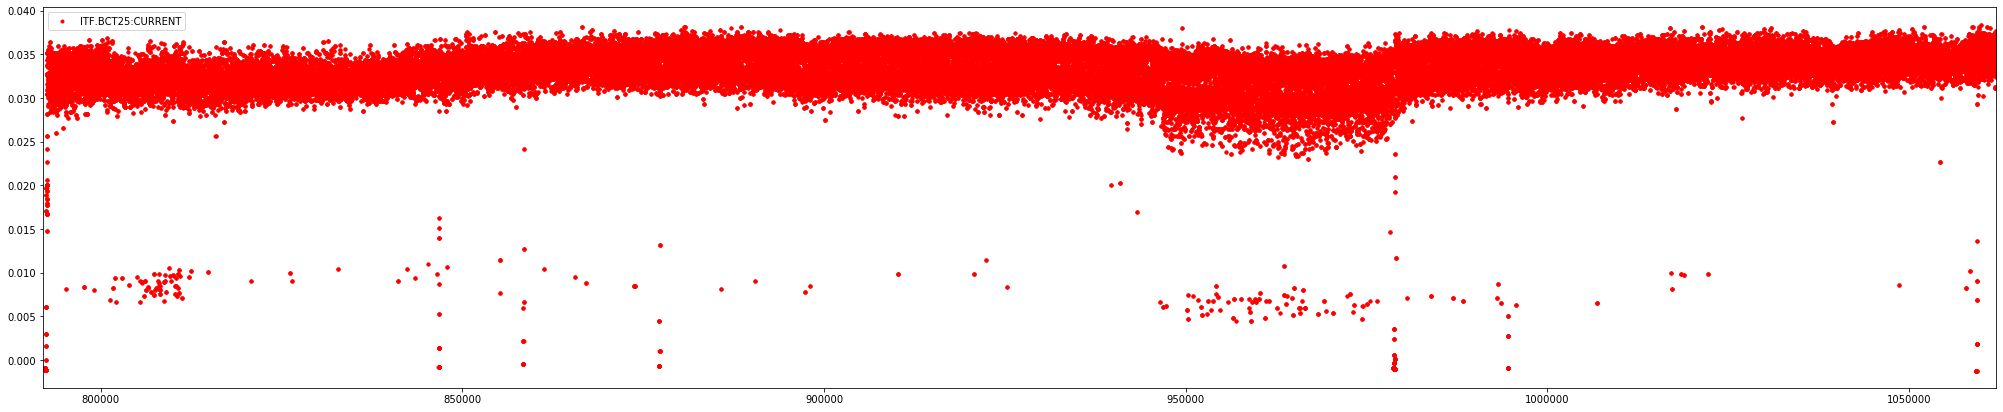

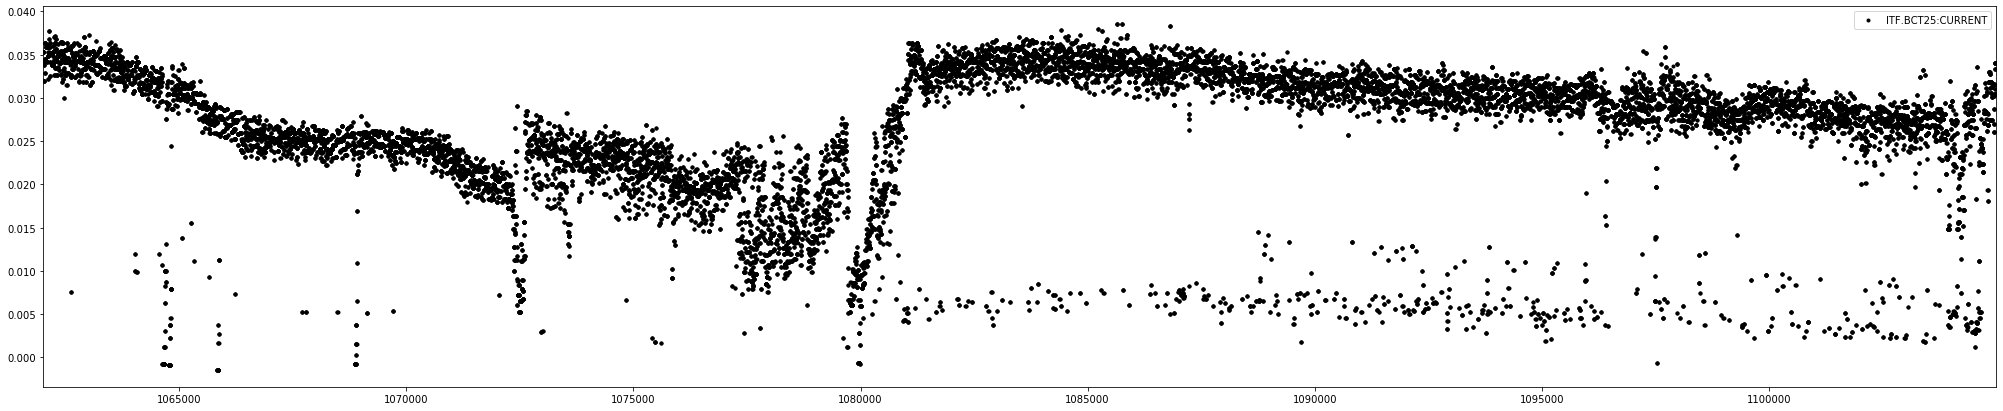

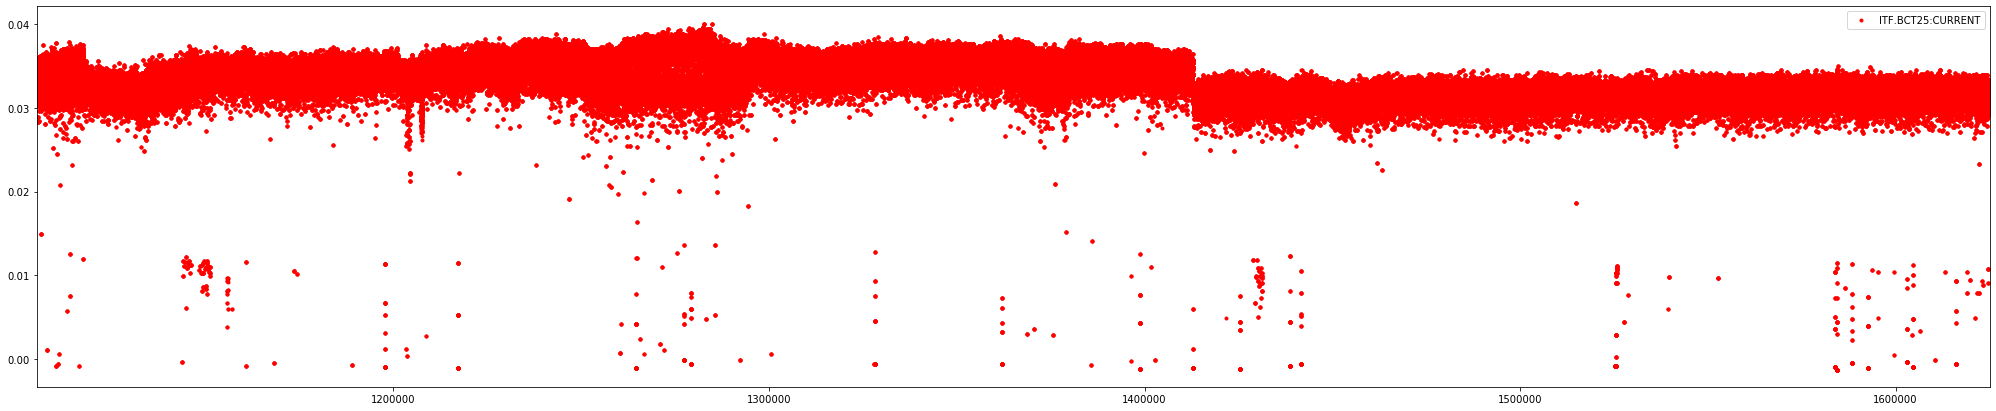

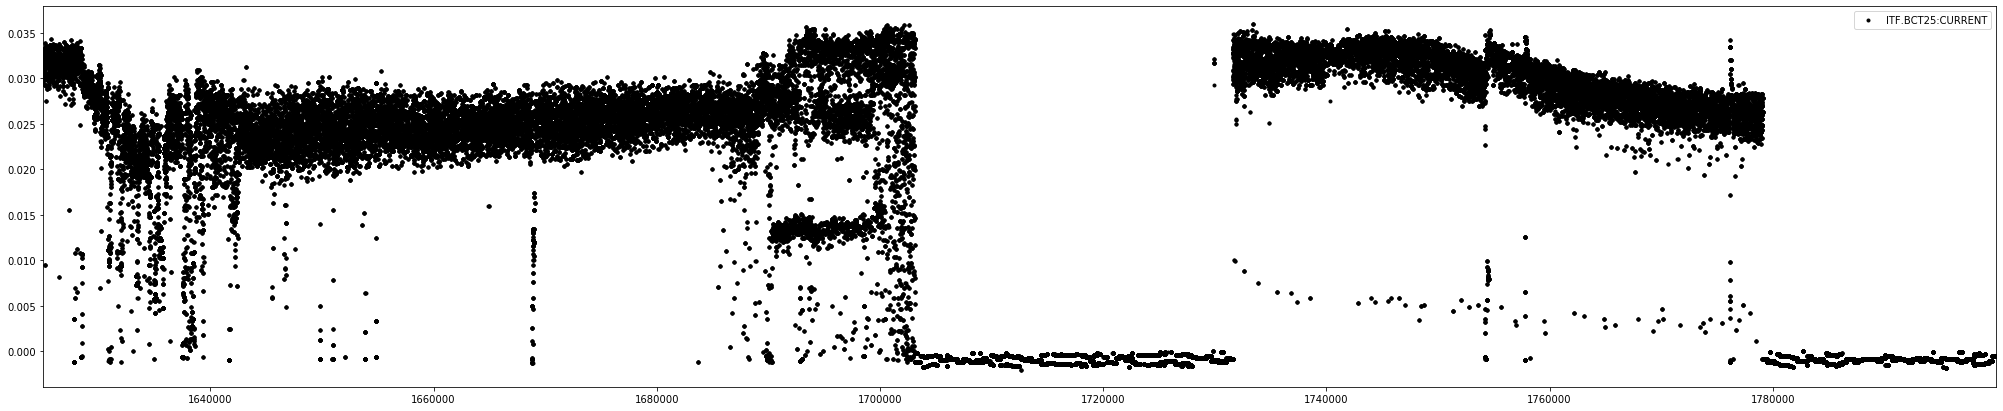

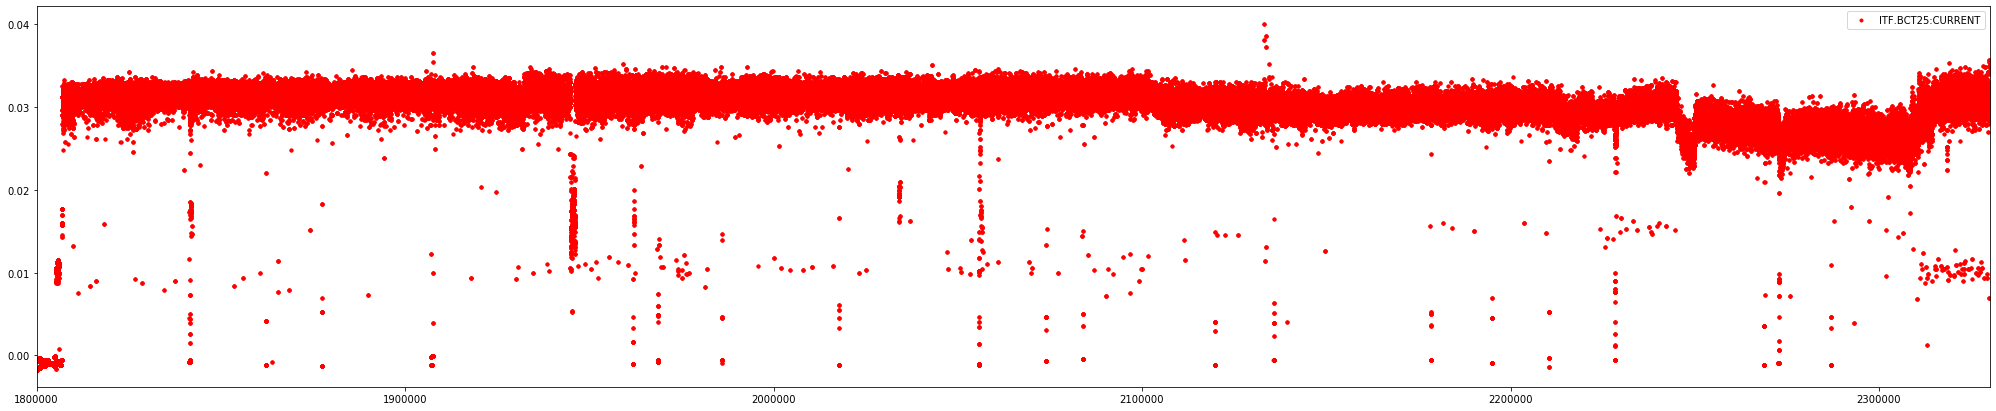

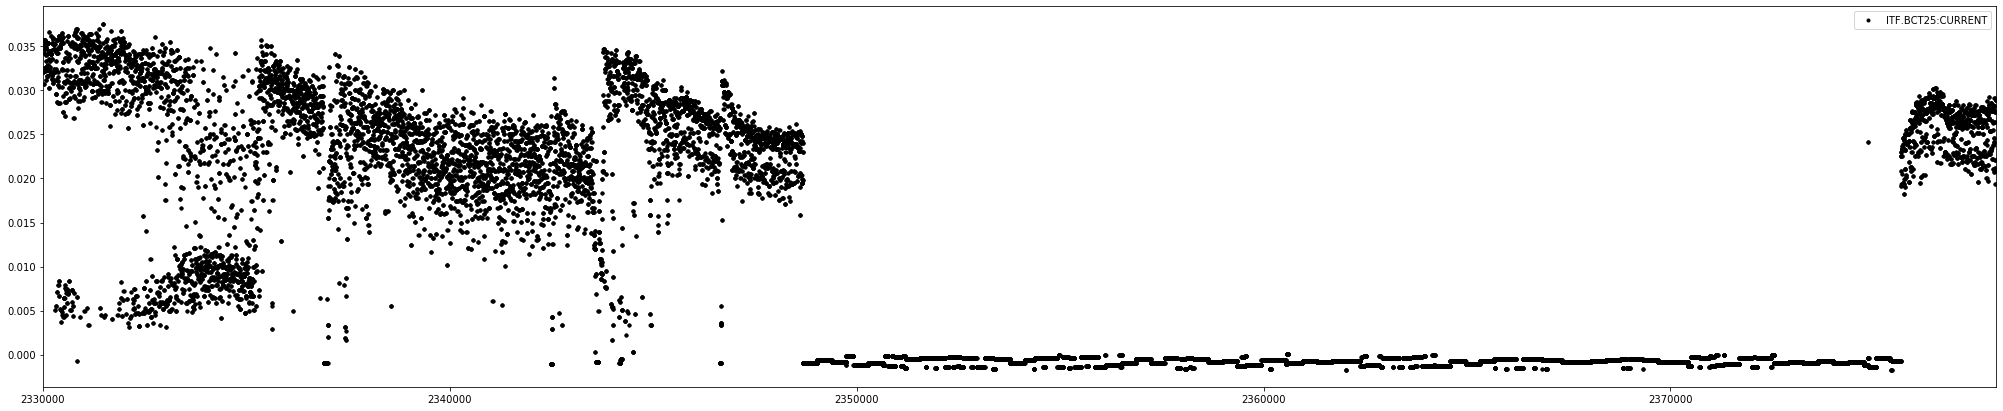

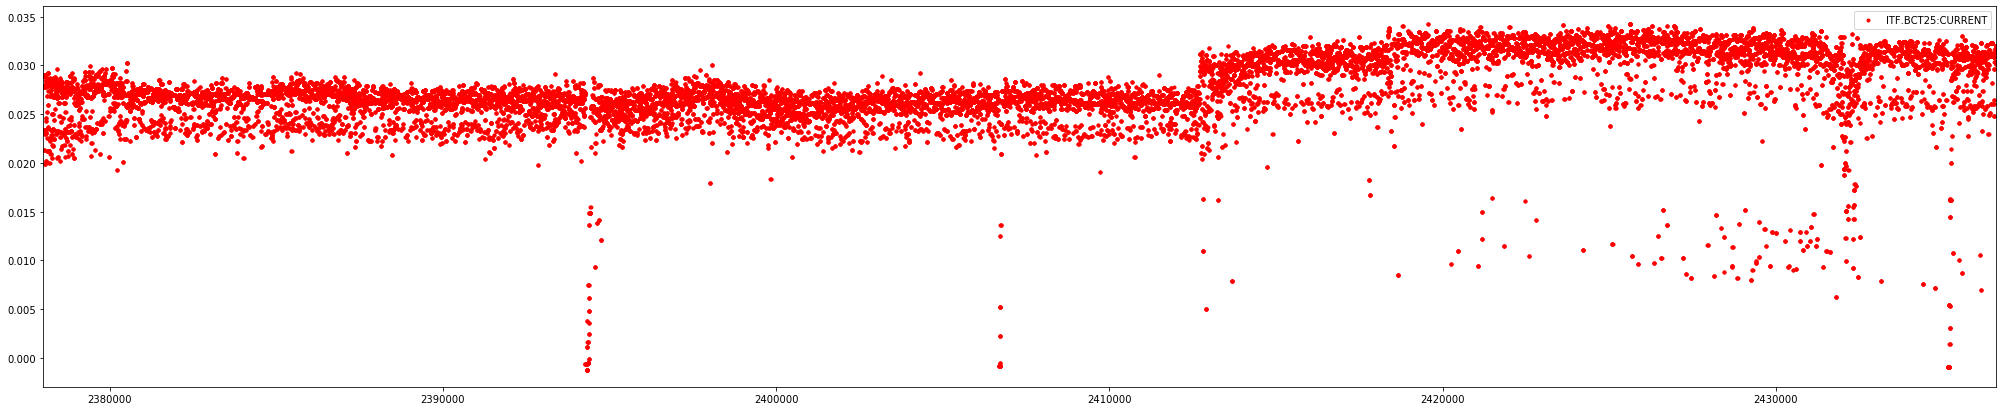

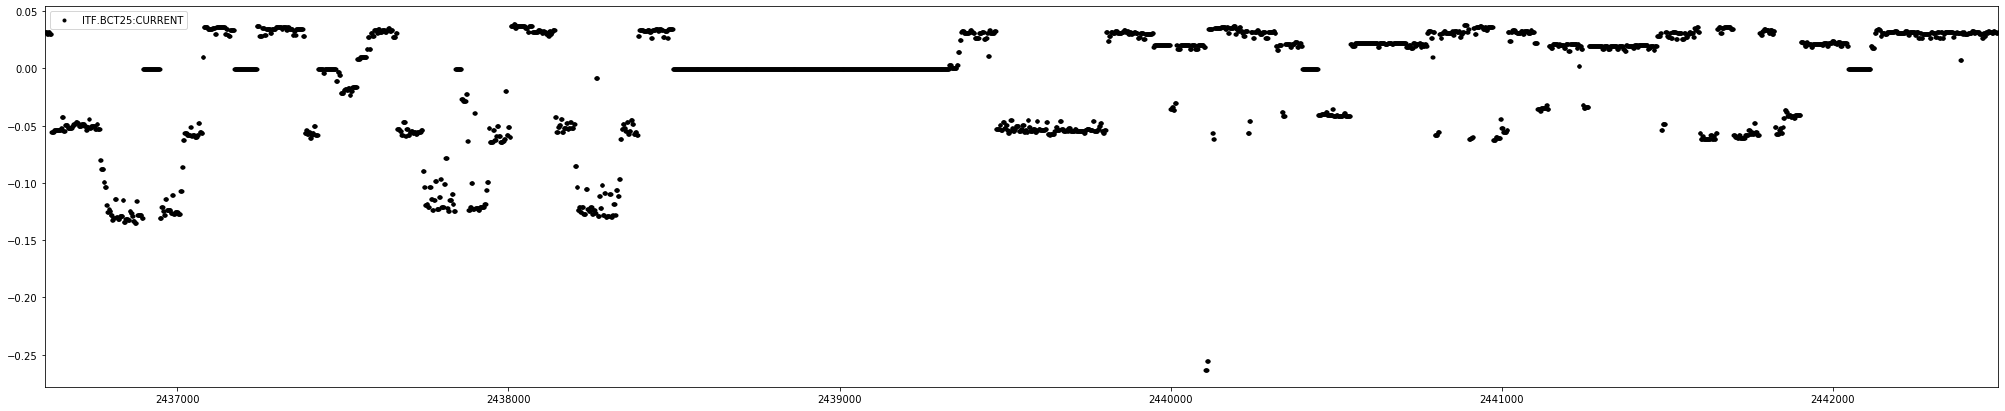

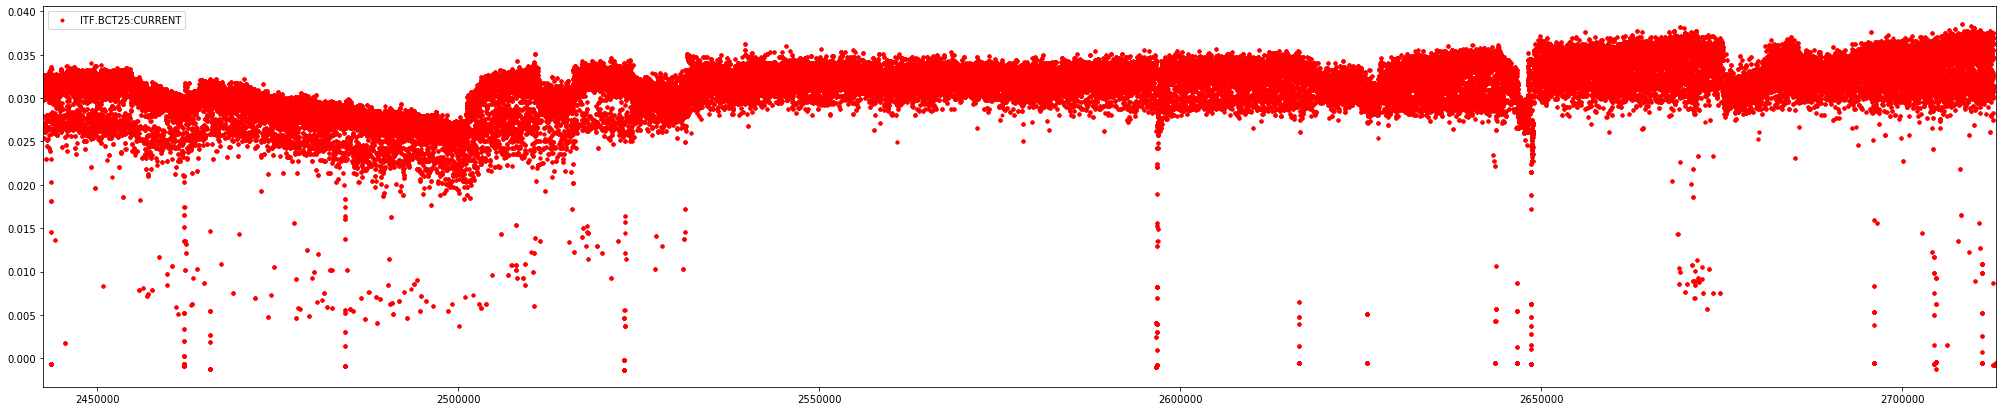

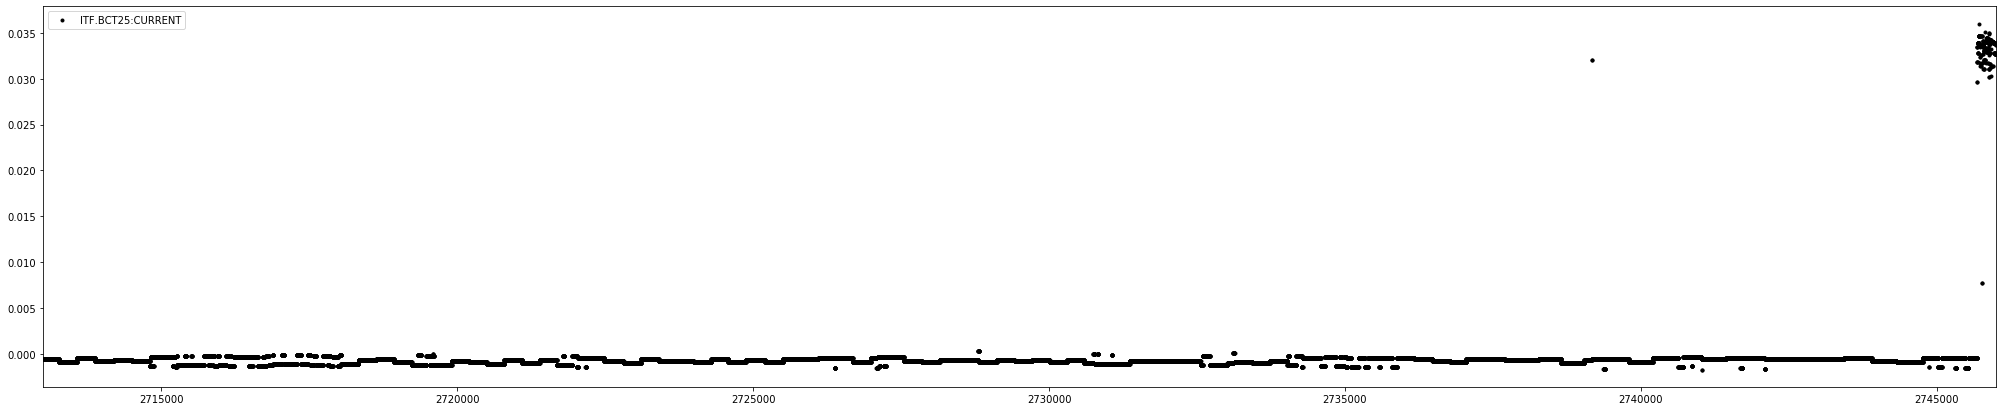

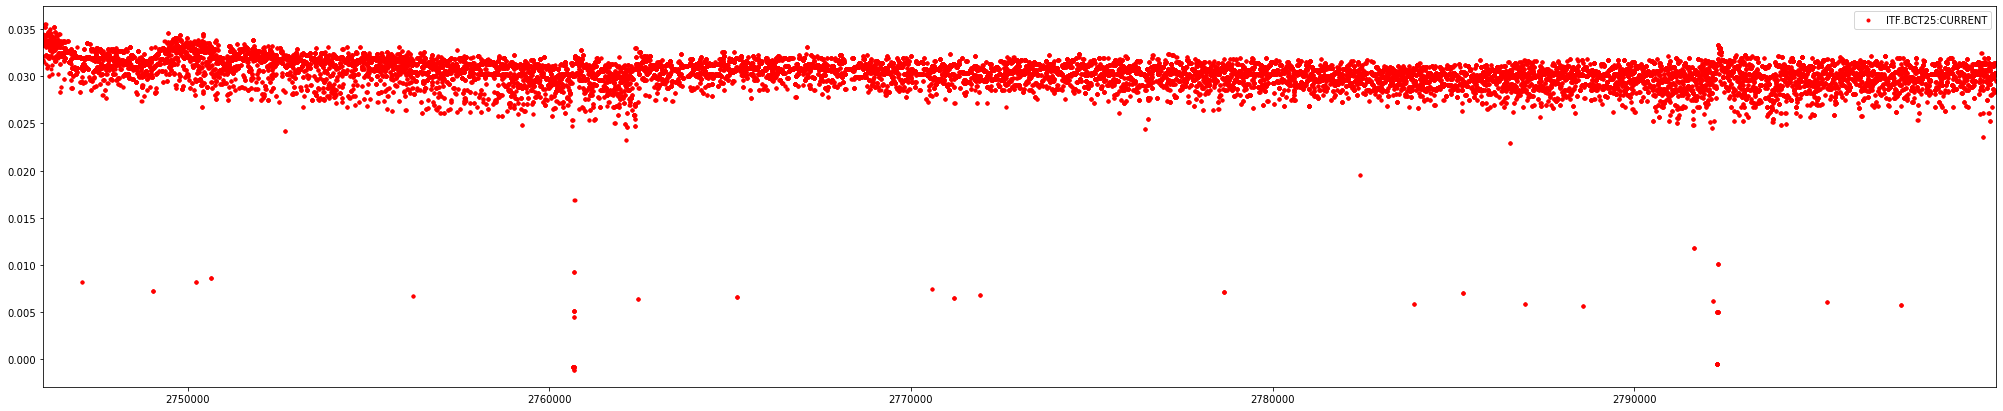

In [16]:
data['IsSourceStable'] = False
for i in range(1, len(separators)):
    source_is_stable = i%2==0
    col = 'red' if source_is_stable else 'black'
    data.iloc[separators[i-1]:separators[i]].plot(style='k.', y='ITF.BCT25:CURRENT', c=col)
    data.iloc[separators[i-1]:separators[i], data.columns.get_loc('IsSourceStable')] = source_is_stable

The red plots above indicate time frames, where the source run well. We will pick them out and save them to a different file, so we always have access to this cleaned data.

In [19]:
import csv

sourceUnstable = 0 # 0==stable, 1==unstable
if sourceUnstable == 0:
    file = stableSourceData
else:
    file = unstableSourceData

with open(rawData, 'rt') as inp, open(file, 'wt') as output:
    reader = csv.reader(inp)
    writer = csv.writer(output)
    rowCount = 0
    currentSeparatorIndex = 1
    for row in reader:
        isSourceStable = currentSeparatorIndex % 2 == sourceUnstable
        if rowCount-1 == separators[currentSeparatorIndex]:
            currentSeparatorIndex+=1
        if rowCount==0 or isSourceStable:
            writer.writerow(row)
            
        if currentSeparatorIndex == len(separators):
            break

        rowCount += 1

### Exploration on data of a properly running source

In [4]:
fields = ['ITF.BCT25:CURRENT']
data_stable = read_data(stableSourceData, fields)
data_stable

,ITF.BCT25:CURRENT
0,0.0312
1,0.0312
2,0.0312
3,0.0312
4,0.0312
5,0.0312
6,0.0312
7,0.0312
8,0.0323
9,0.0323


In [ ]:
col = 'black'
data_stable.plot(style='k.', y='ITF.BCT25:CURRENT', c=col)
data_stable.plot(style='k.', y='ITL.BCT05:CURRENT', c=col)
data_stable.plot(style='k.', y='IP.NSRCGEN:BIASDISCAQNV', c=col)
data_stable.plot(style='k.', y='IP.NSRCGEN:GASSASAQN', c=col)
data_stable.plot(style='k.', y='IP.NSRCGEN:OVEN1AQNP', c=col)
data_stable.plot(style='k.', y='IP.NSRCGEN:SOURCEHTAQNI', c=col)
data_stable.plot(style='k.', y='IP.SAIREM2:FORWARDPOWER', c=col)
data_stable.plot(style='k.', y='IP.SOLCEN.ACQUISITION:CURRENT', c=col)
data_stable.plot(style='k.', y='IP.SOLEXT.ACQUISITION:CURRENT', c=col)
data_stable.plot(style='k.', y='IP.SOLINJ.ACQUISITION:CURRENT', c=col)

The first goal is to be able to automatically classify data into stable/unstable source. For this, evaluation of _ITF.BCT25:CURRENT_ is necessary, bacause this parameter is the one to be tuned.
A really naive approach is to decide based on mean and variance of the beam in a sliding window, as a stable source should exhibit linear behavior.

The next cells are for choosing the parameters.

In [5]:
sliding_window_size = int(100*60/1.2) 
sliding_window_size

5000

In [6]:
data_stable['ITF.BCT25:CURRENT_MEAN'] = data_stable['ITF.BCT25:CURRENT'].rolling(sliding_window_size).mean()
data_stable['ITF.BCT25:CURRENT_VAR'] = data_stable['ITF.BCT25:CURRENT'].rolling(sliding_window_size).var()
data_stable

,ITF.BCT25:CURRENT,ITF.BCT25:CURRENT_MEAN,ITF.BCT25:CURRENT_VAR
0,0.0312,NaN,NaN
1,0.0312,NaN,NaN
2,0.0312,NaN,NaN
3,0.0312,NaN,NaN
4,0.0312,NaN,NaN
5,0.0312,NaN,NaN
6,0.0312,NaN,NaN
7,0.0312,NaN,NaN
8,0.0323,NaN,NaN
9,0.0323,NaN,NaN


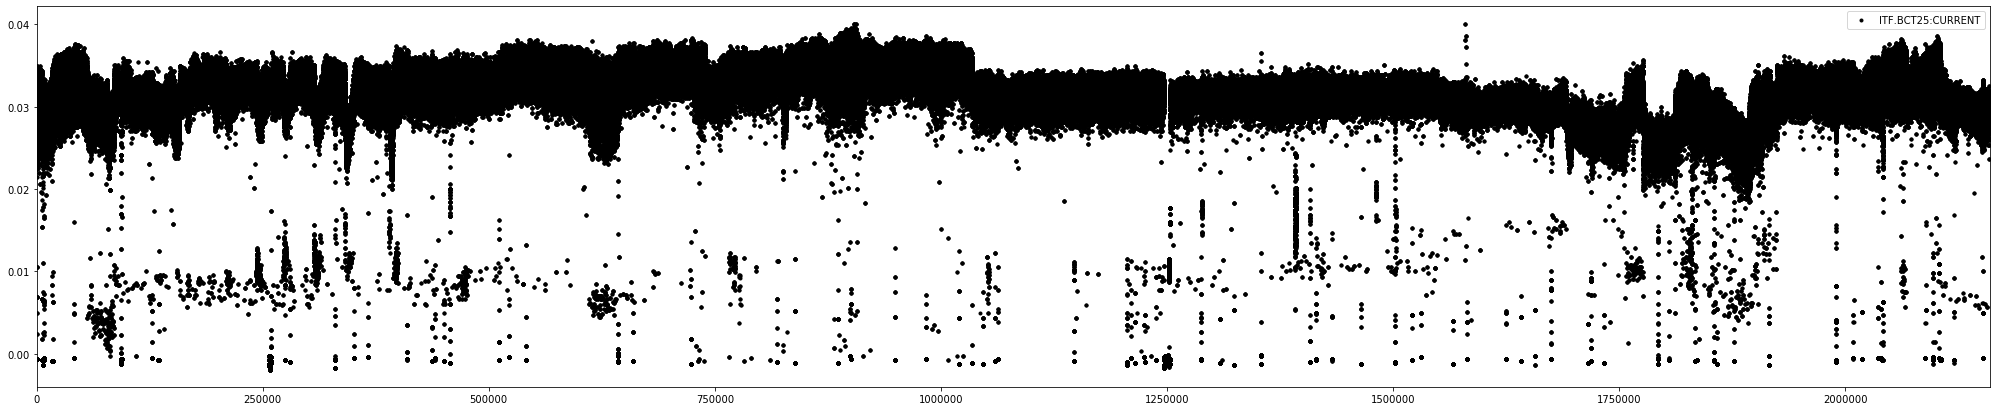

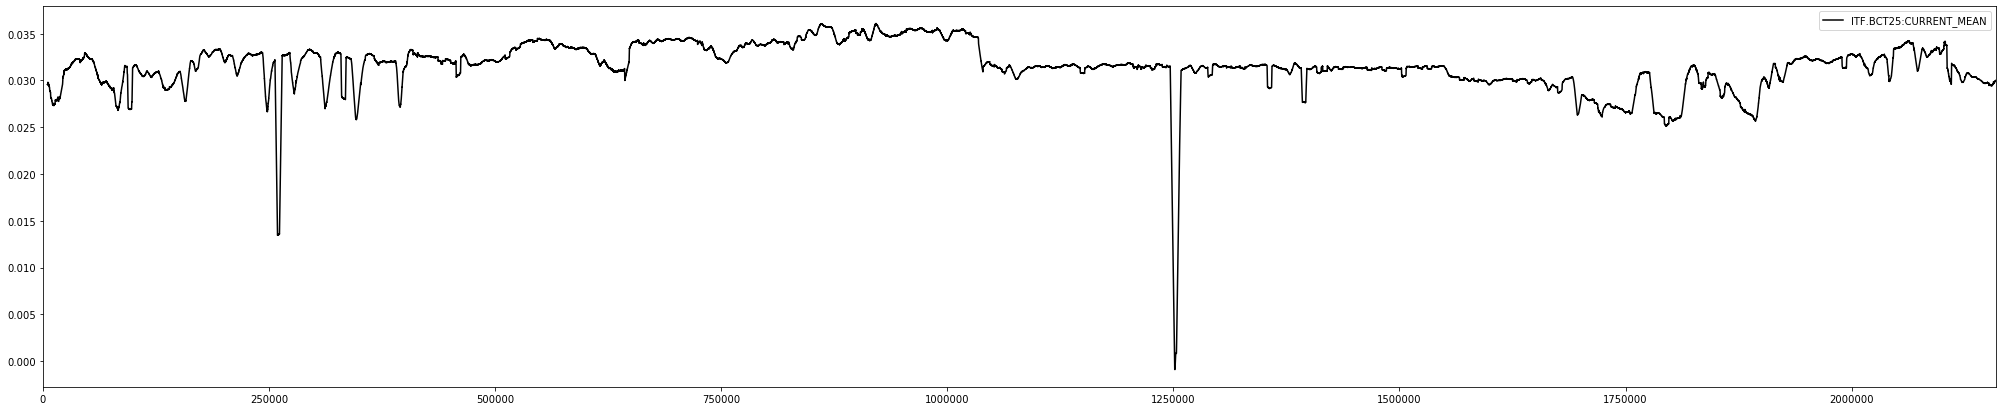

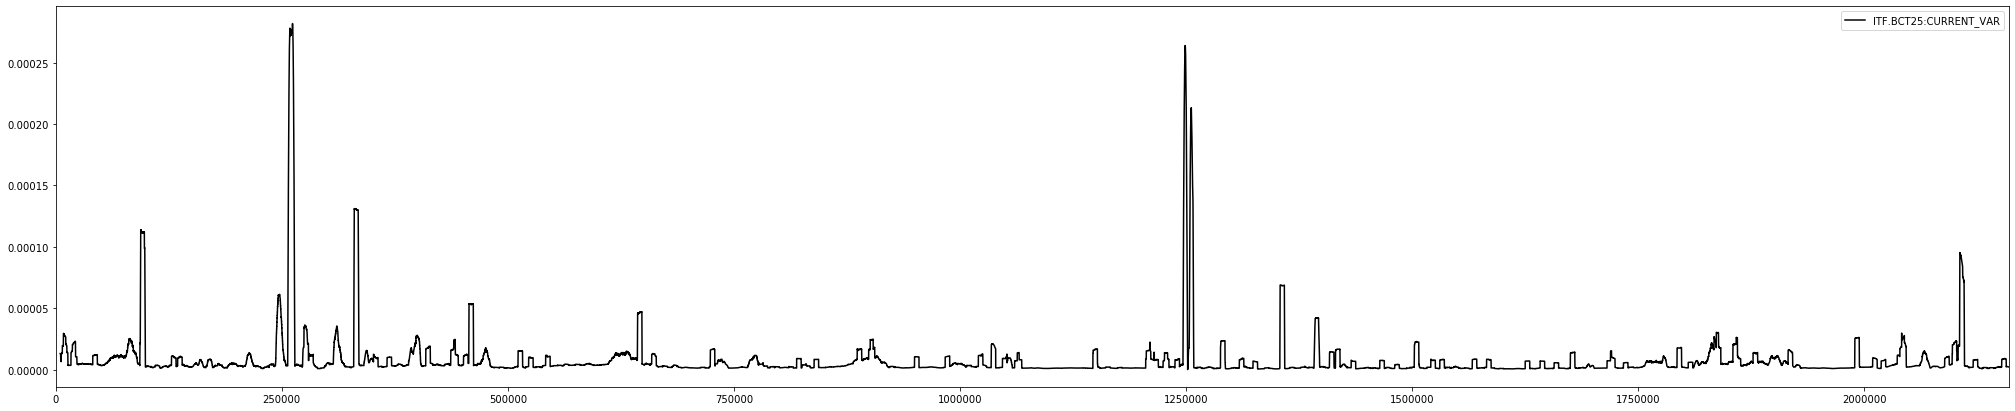

In [9]:
col = 'black'
data_stable.plot(style='k.', y='ITF.BCT25:CURRENT', c=col)
data_stable.plot(y='ITF.BCT25:CURRENT_MEAN', c=col)
data_stable.plot(y='ITF.BCT25:CURRENT_VAR', c=col)

### Exploration of an unstable source

In [11]:
fields = ['ITF.BCT25:CURRENT']
data_unstable = read_data(unstableSourceData, fields)
#data_unstable = pd.read_csv(unstableSourceData).fillna(method='ffill')
data_unstable

,ITF.BCT25:CURRENT
0,NaN
1,NaN
2,NaN
3,-0.0009
4,-0.0009
5,-0.0009
6,-0.0009
7,-0.0009
8,-0.0009
9,-0.0009


In [ ]:
col = 'black'
data_unstable.plot(style='k.', y='ITF.BCT25:CURRENT', c=col)
data_unstable.plot(style='k.', y='ITL.BCT05:CURRENT', c=col)
data_unstable.plot(style='k.', y='IP.NSRCGEN:BIASDISCAQNV', c=col)
data_unstable.plot(style='k.', y='IP.NSRCGEN:GASSASAQN', c=col)
data_unstable.plot(style='k.', y='IP.NSRCGEN:OVEN1AQNP', c=col)
data_unstable.plot(style='k.', y='IP.NSRCGEN:SOURCEHTAQNI', c=col)
data_unstable.plot(style='k.', y='IP.SAIREM2:FORWARDPOWER', c=col)
data_unstable.plot(style='k.', y='IP.SOLCEN.ACQUISITION:CURRENT', c=col)
data_unstable.plot(style='k.', y='IP.SOLEXT.ACQUISITION:CURRENT', c=col)
data_unstable.plot(style='k.', y='IP.SOLINJ.ACQUISITION:CURRENT', c=col)

In [12]:
data_unstable['ITF.BCT25:CURRENT_MEAN'] = data_unstable['ITF.BCT25:CURRENT'].rolling(sliding_window_size).mean()
data_unstable['ITF.BCT25:CURRENT_VAR'] = data_unstable['ITF.BCT25:CURRENT'].rolling(sliding_window_size).var()
data_unstable

,ITF.BCT25:CURRENT,ITF.BCT25:CURRENT_MEAN,ITF.BCT25:CURRENT_VAR
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,-0.0009,NaN,NaN
4,-0.0009,NaN,NaN
5,-0.0009,NaN,NaN
6,-0.0009,NaN,NaN
7,-0.0009,NaN,NaN
8,-0.0009,NaN,NaN
9,-0.0009,NaN,NaN


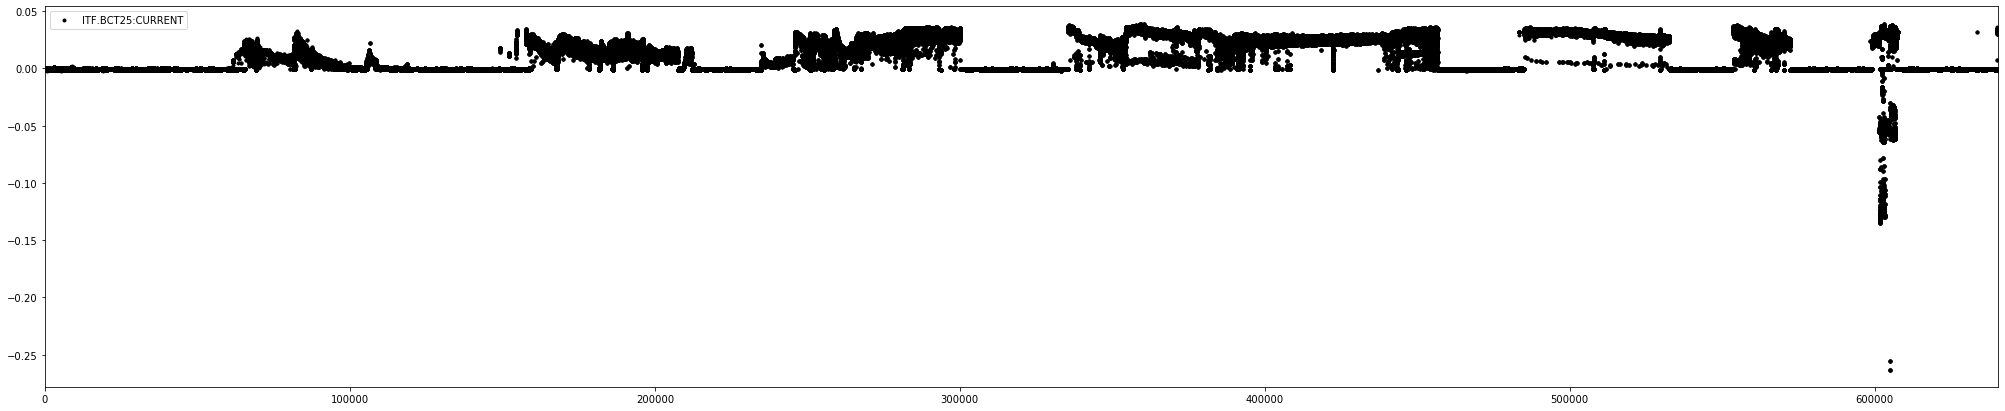

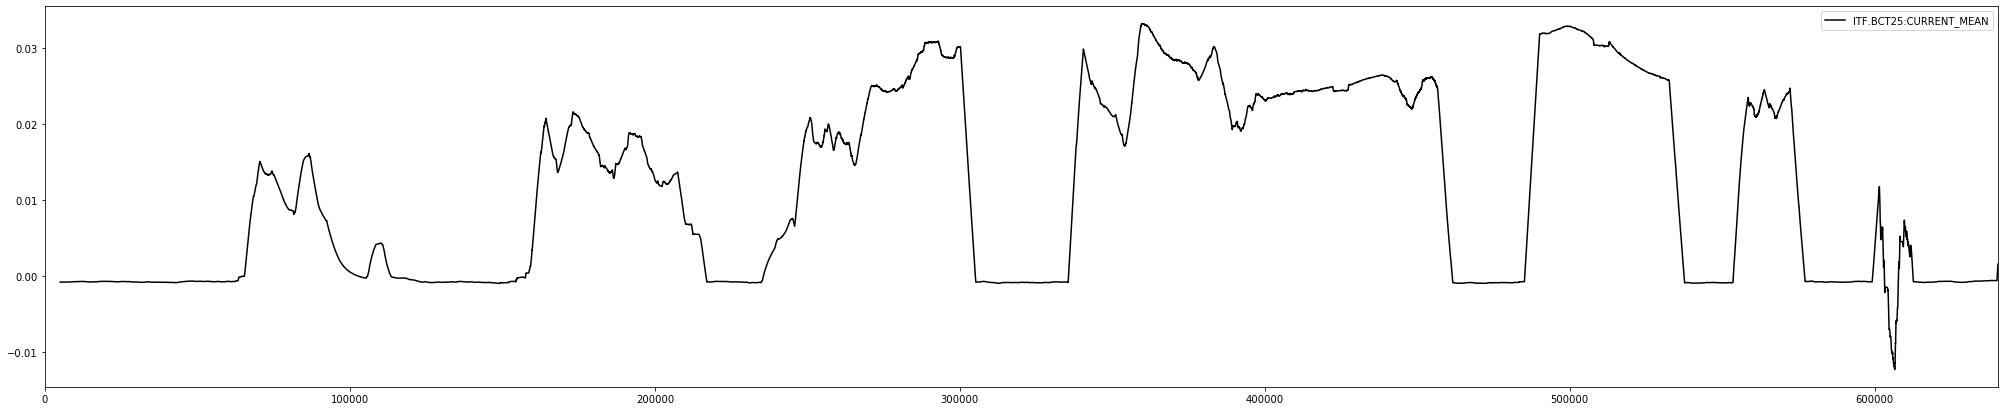

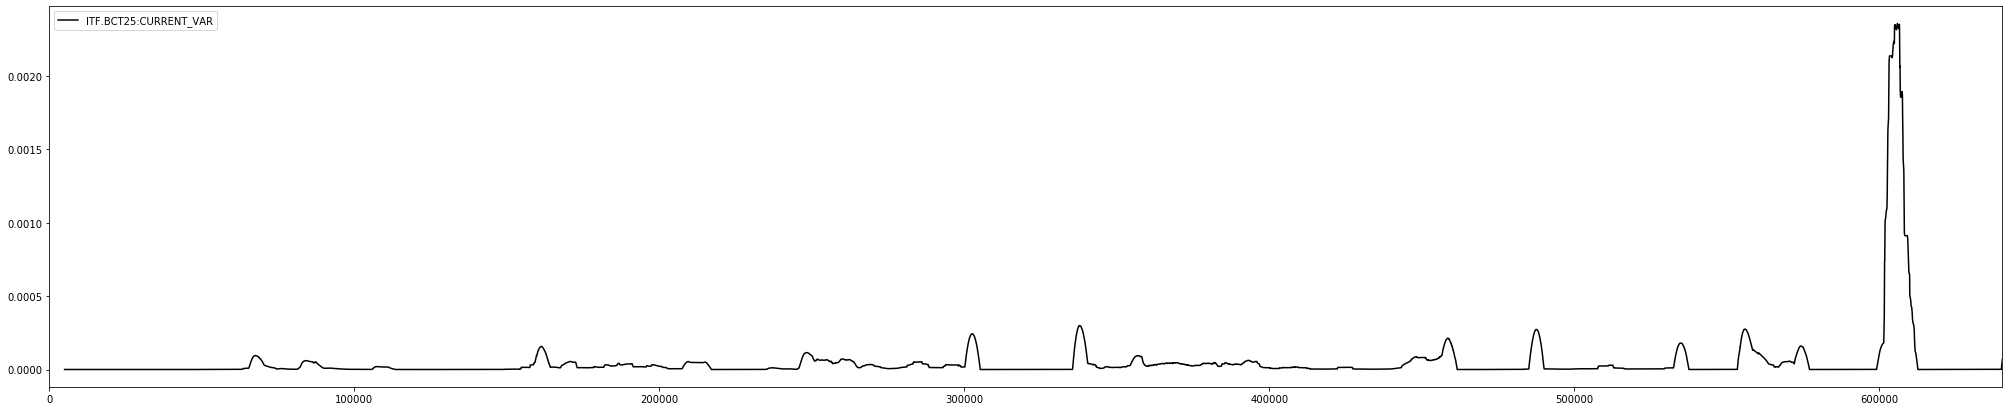

In [13]:
col = 'black'
data_unstable.plot(style='k.', y='ITF.BCT25:CURRENT', c=col)
data_unstable.plot(y='ITF.BCT25:CURRENT_MEAN', c=col)
data_unstable.plot(y='ITF.BCT25:CURRENT_VAR', c=col)

Based on the diagrams above we will say that a source is stable if the BCT25 Current _> 0.025 mA_ and has a variance of _0 < 0.00005_ in a time window of _100 Minutes_. This has to be validated further in other experiments.

We will now use these parameters on the original _Nov_2018_ data as a first validation step.

### Parameter Validation on Nov_2018 data

In [7]:
current_mean_min = 0.025
current_var_max = 0.00005
sliding_window_size = int(100*60/1.2)

In [6]:
fields = ['ITF.BCT25:CURRENT']
data = read_data(rawData, fields)

In [8]:
data['ITF.BCT25:CURRENT_MEAN'] = data['ITF.BCT25:CURRENT'].rolling(sliding_window_size).mean()
data['ITF.BCT25:CURRENT_VAR'] = data['ITF.BCT25:CURRENT'].rolling(sliding_window_size).var()
data.head()

,ITF.BCT25:CURRENT,ITF.BCT25:CURRENT_MEAN,ITF.BCT25:CURRENT_VAR
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,-0.0009,NaN,NaN
4,-0.0009,NaN,NaN


In [9]:
def is_source_stable(mean, var):
    if mean == float('NaN') or var == float('NaN'):
        return ''
    return 1 if mean > current_mean_min and var < current_var_max else 0

In [10]:
data['IS_STABLE'] = data.apply(lambda row: is_source_stable(row['ITF.BCT25:CURRENT_MEAN'], row['ITF.BCT25:CURRENT_VAR']), axis=1)

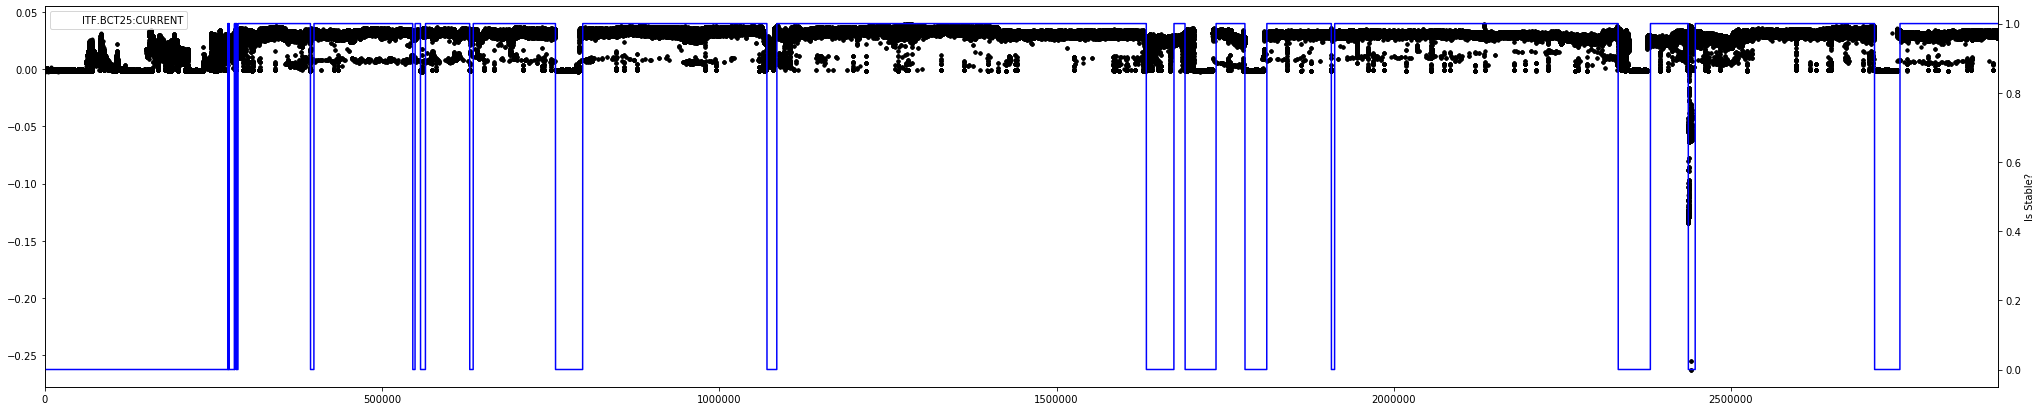

In [11]:
data.plot(y=['ITF.BCT25:CURRENT'], style='k.')
ax = data['IS_STABLE'].plot(secondary_y=True, color='blue')
ax.set_ylabel('Is Stable?')
plt.show()

At a first sight without expert knowledge, classification based on these two attributes seems to work, at least on this data. Further test are requiered.